## VERITAS UNIVERSITY ABUJA


## NAME: Akpojiyovwi Emmanuel Efetobore
## MATRIC NO: VUG/CSC/22/7922
## LEVEL: 300 
## COURSE CODE: CSC 308
## COURSE TITLE: Computer Science Innovation and New Technologies
## LECTURER: MR FELIX ULOKO


# California Housing Price Prediction Analysis

### Project Overview
#### This project analyzes the California Housing Dataset to predict median house values based on various features. The analysis includes data preprocessing, exploratory data analysis, visualization, and machine learning modeling. 
### Dataset Description
#### The California Housing Dataset contains information about housing blocks in California. The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

### Features
#### - longitude: A measure of how far west a house is; a higher value is farther west
#### - latitude: A measure of how far north a house is; a higher value is farther north
#### - housing_median_age: Median age of a house within a block; a lower number is a newer building
#### - total_rooms: Total number of rooms within a block
#### - total_bedrooms: Total number of bedrooms within a block
#### - population: Total number of people residing within a block
#### - households: Total number of households, a group of people residing within a home unit
#### - median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
#### - median_house_value: Median house value for households within a block (measured in US Dollars)

In [51]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better visualizations
plt.style.use('default')  # Use default style
sns.set_theme()  # Set seaborn theme
sns.set_palette('husl')  # Set color palette

### 1. Data Loading and Initial Inspection
#### This section covers the initial loading and inspection of the California Housing Dataset.


In [3]:
# Load the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['median_house_value'] = housing.target

### 2. Data Inspection


In [7]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

Dataset Shape: (20640, 9)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  median_house_value  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422  

Last 5 rows:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.

In [13]:
print("\nShape of the data:")
print(df.shape)


Shape of the data:
(20640, 9)


In [9]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


### 3. Data Cleaning and Preprocessing
#### This section handles data cleaning, including:
#### - Checking for missing values
#### - Removing duplicates
#### - Scaling numerical features

In [14]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64


In [15]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [18]:
# Scale the features
scaler = StandardScaler()
features = df.drop('median_house_value', axis=1)
target = df['median_house_value']

In [19]:
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['median_house_value'] = target

### 3. Exploratory Data Analysis (EDA)
#### This section covers the initial exploratory analysis of the dataset before visualization.

In [10]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  median_house_value  
count  20640.000000  20640.000000  20640.000000        20640.000000  
mean       3.070655     35.631861   -119.569704            2.068558  
std       10.386050      2.135952      2.003532         

In [20]:
# Check data types and missing values
print("\nData Types:")
print(df.dtypes)


Data Types:
MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
median_house_value    float64
dtype: object


In [21]:
# Check for outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of outliers per feature (using IQR method):")
print(outliers)


Number of outliers per feature (using IQR method):
MedInc                 681
HouseAge                 0
AveRooms               511
AveBedrms             1424
Population            1196
AveOccup               711
Latitude                 0
Longitude                0
median_house_value    1071
dtype: int64


In [22]:
# Correlation analysis
print("\nCorrelation with target variable (median_house_value):")
correlations = df.corr()['median_house_value'].sort_values(ascending=False)
print(correlations)


Correlation with target variable (median_house_value):
median_house_value    1.000000
MedInc                0.688075
AveRooms              0.151948
HouseAge              0.105623
AveOccup             -0.023737
Population           -0.024650
Longitude            -0.045967
AveBedrms            -0.046701
Latitude             -0.144160
Name: median_house_value, dtype: float64


### 4. Data Visualization
#### In this section, we'll create various visualizations to understand the data better. Each visualization serves a specific purpose in our analysis:

In [54]:
def create_and_save_charts(data, output_dir=r'C:\Users\BEXX\Desktop\House'):
    # Create charts directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

### 1. Correlation Heatmap
#### Purpose: To understand the relationships between all features in the dataset
#### Interpretation:
#### - Dark red indicates strong positive correlation
#### - Dark blue indicates strong negative correlation
#### - Lighter colors indicate weaker correlations
#### - The diagonal is always 1.0 (perfect correlation with itself)
### Key Insights:
#### - Helps identify which features are most strongly related to house prices
#### - Reveals potential multicollinearity between features
#### - Guides feature selection for the model

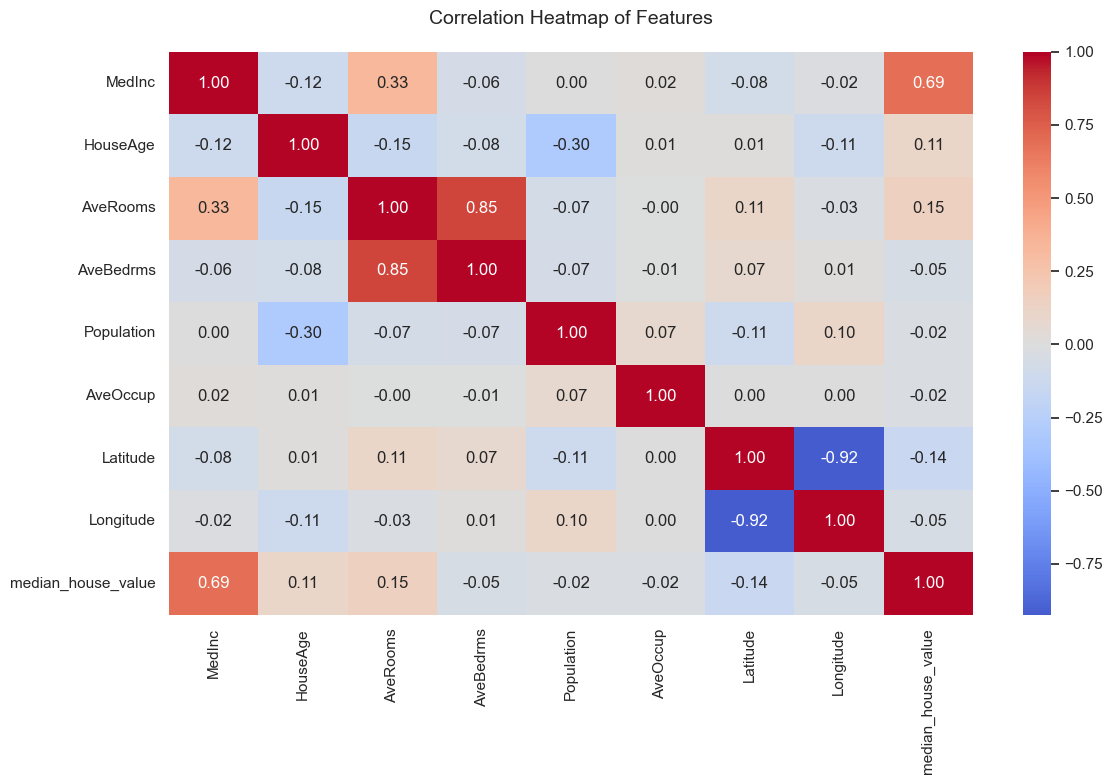

In [63]:
# 1. Correlation Heatmap (Seaborn)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Features', pad=20, fontsize=14)
plt.tight_layout()
plt.savefig(('correlation_heatmap.png'), dpi=300, bbox_inches='tight')
plt.show()

### 2. Distribution of House Values
#### Purpose: To understand the distribution of our target variable
#### Interpretation:
#### - The x-axis shows house values in $100,000 units
#### - The y-axis shows the frequency of each value
#### - The KDE curve shows the probability density
#### Key Insights:
#### - Reveals if the distribution is normal, skewed, or has multiple modes
#### - Helps identify potential outliers
#### - Guides decisions about data transformation needs

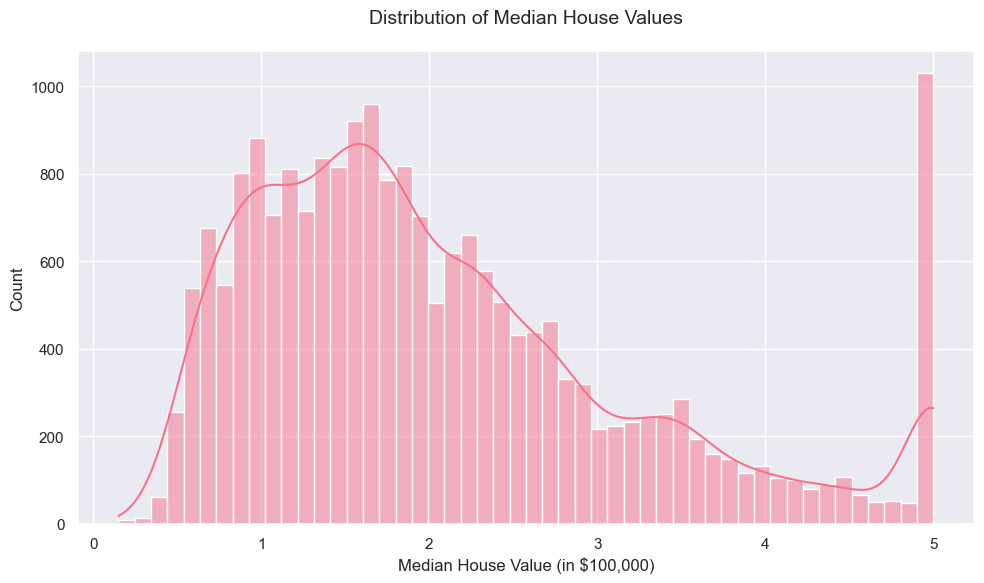

In [65]:
# 2. Distribution of House Values (Seaborn)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='median_house_value', bins=50, kde=True)
plt.title('Distribution of Median House Values', pad=20, fontsize=14)
plt.xlabel('Median House Value (in $100,000)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig(('House_value_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

### 3. Box Plots of Features
#### Purpose: To identify outliers and understand the distribution of each feature
#### Interpretation:
#### - The box shows the interquartile range (IQR)
#### - The line inside the box is the median
#### - The whiskers extend to the most extreme non-outlier points
#### - Points beyond the whiskers are outliers
#### Key Insights:
#### - Identifies outliers in each feature
#### - Shows the spread and skewness of the data
#### - Helps in detecting potential data quality issues

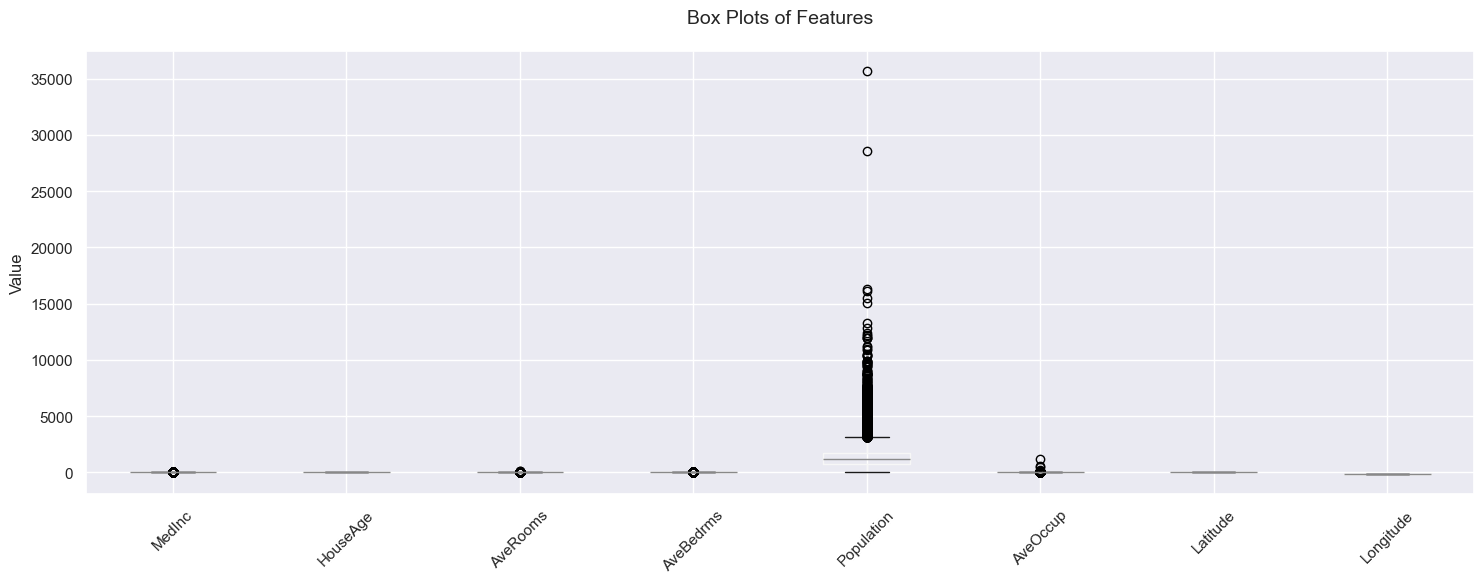

In [66]:
# 3. Box Plots for Numerical Features (Matplotlib)
plt.figure(figsize=(15, 6))
# Create boxplot for all columns except the target variable
df.boxplot(column=[col for col in df.columns if col != 'median_house_value'])
plt.xticks(rotation=45)
plt.title('Box Plots of Features', pad=20, fontsize=14)
plt.ylabel('Value', fontsize=12)
plt.tight_layout()
plt.savefig(('box_plot.png'), dpi=300, bbox_inches='tight')
plt.show()

### 4. Income vs House Value Scatter Plot
#### Purpose: To examine the relationship between median income and house values
#### Interpretation:
#### - Each point represents a housing block
#### - X-axis shows median income in $10,000 units
#### - Y-axis shows median house value in $100,000 units
### Key Insights:
#### - Shows the strength and direction of the relationship
#### - Reveals any non-linear patterns
#### - Helps identify potential outliers or clusters

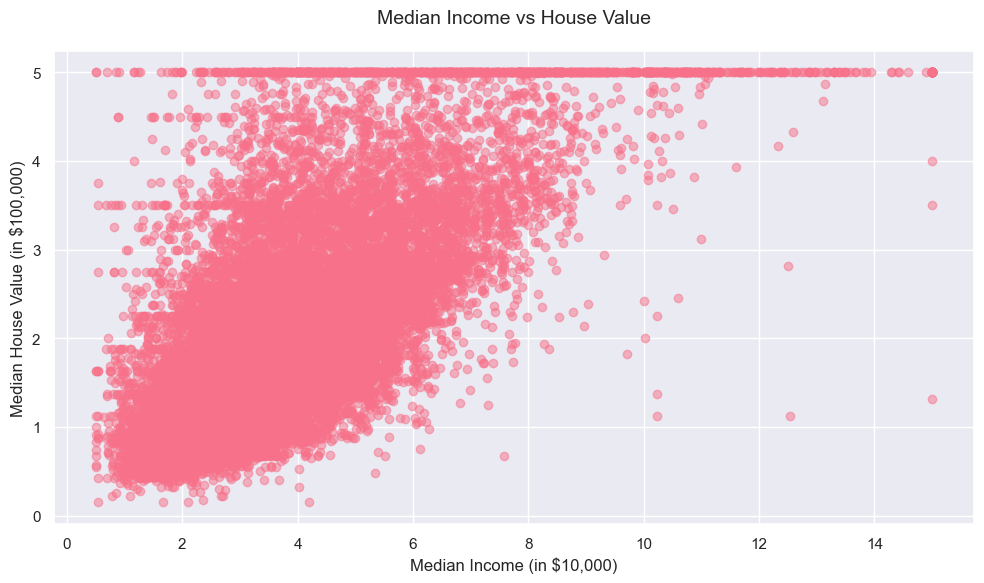

In [67]:
# 4. Scatter Plot of Median Income vs House Value (Matplotlib)
plt.figure(figsize=(10, 6))
plt.scatter(df['MedInc'], df['median_house_value'], alpha=0.5)
plt.title('Median Income vs House Value', pad=20, fontsize=14)
plt.xlabel('Median Income (in $10,000)', fontsize=12)
plt.ylabel('Median House Value (in $100,000)', fontsize=12)
plt.tight_layout()
plt.savefig(('Income_vs_house.png'), dpi=300, bbox_inches='tight')
plt.show()

### 5. Pair Plot of Selected Features
#### Purpose: To examine relationships between multiple features simultaneously
#### Interpretation:
#### - Diagonal shows the distribution of each feature
#### - Off-diagonal shows scatter plots of feature pairs
#### - KDE curves show the probability density
### Key Insights:
#### - Reveals complex relationships between features
#### - Shows the distribution of each feature
#### - Helps identify potential feature interactions

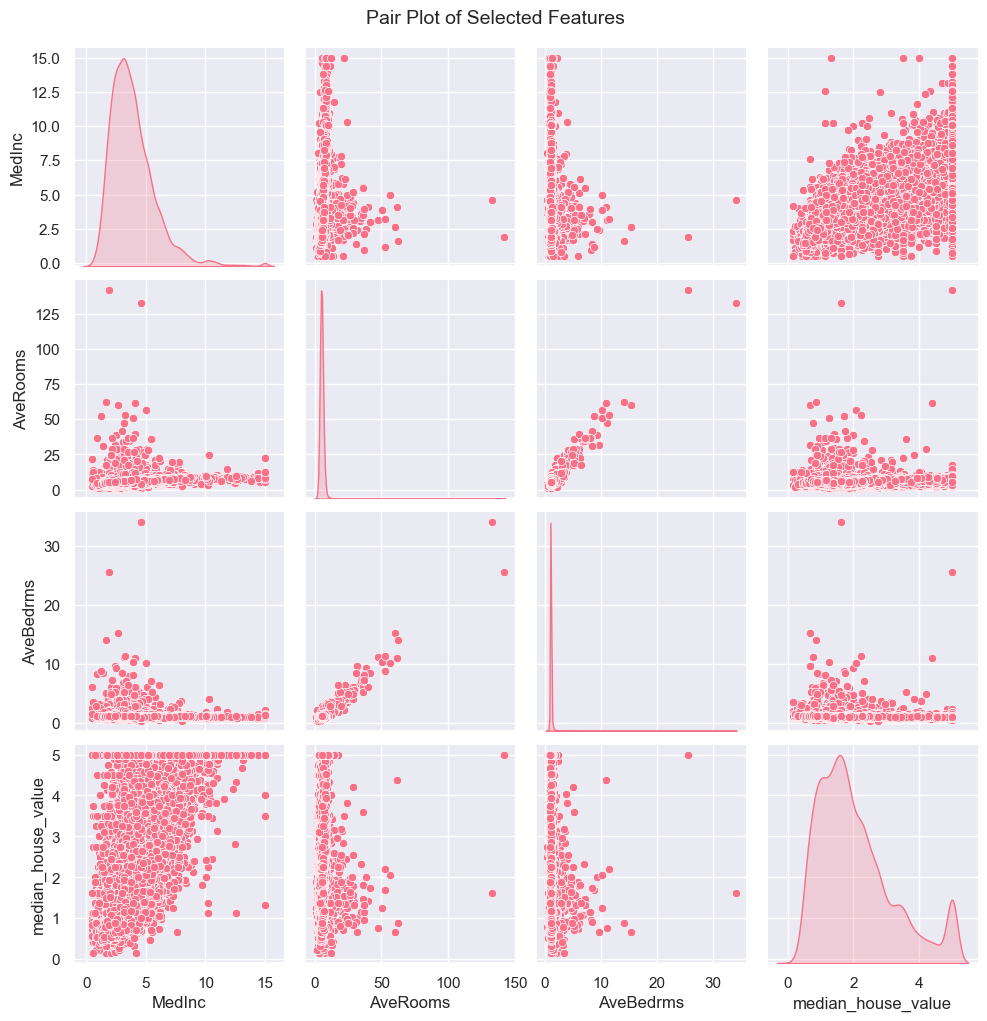

In [69]:
# 5. Pair Plot of Selected Features (Seaborn)
selected_features = ['MedInc', 'AveRooms', 'AveBedrms', 'median_house_value']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02, fontsize=14)
plt.savefig(('Pair_plot.png'), dpi=300, bbox_inches='tight')
plt.show()

### 5.1 Line Plot - House Values Over Time
#### Purpose: To visualize trends in house values across different income levels
#### Interpretation:
#### - X-axis shows median income levels
#### - Y-axis shows median house values
#### - Line shows the trend of house values
### Key Insights:
#### - Shows the relationship between income and house values
#### - Reveals any non-linear trends
#### - Helps identify income thresholds affecting house values

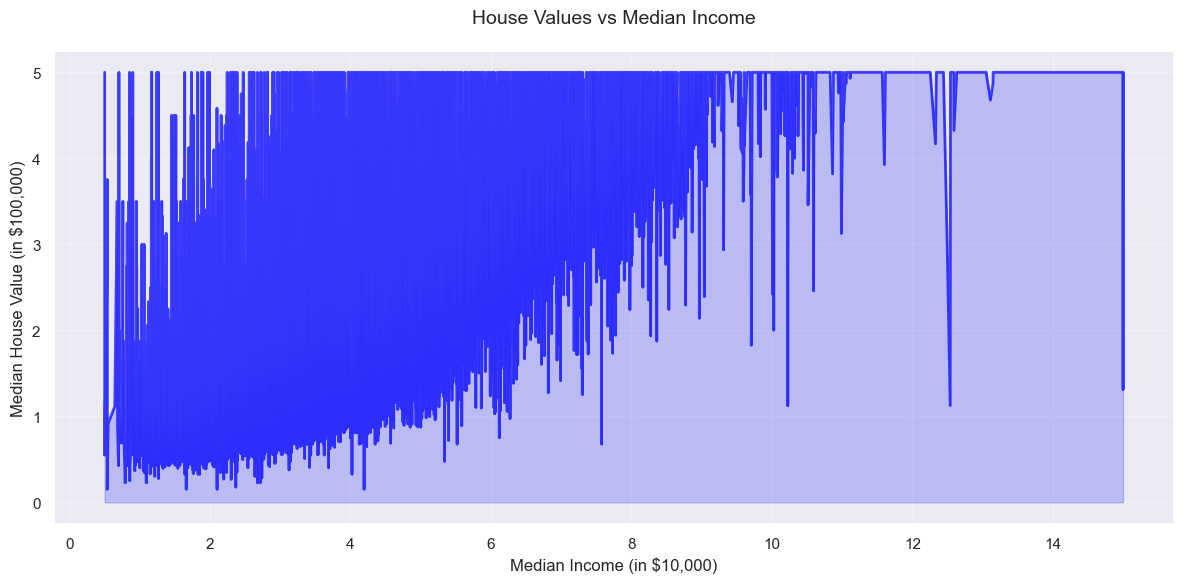

In [70]:
# 5.1 Line Plot (Matplotlib)
plt.figure(figsize=(12, 6))
# Sort data by median income for smooth line
sorted_data = df.sort_values('MedInc')
plt.plot(sorted_data['MedInc'], sorted_data['median_house_value'], 
         linewidth=2, color='blue', alpha=0.7)
plt.fill_between(sorted_data['MedInc'], sorted_data['median_house_value'], 
                 alpha=0.2, color='blue')
plt.title('House Values vs Median Income', pad=20, fontsize=14)
plt.xlabel('Median Income (in $10,000)', fontsize=12)
plt.ylabel('Median House Value (in $100,000)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(('Line_plot.png'), dpi=300, bbox_inches='tight')
plt.show()

### 5. Machine Learning Model Development
#### This section covers:
#### - Data preparation for modeling
#### - Model training and evaluation
#### - Performance metrics analysis
#### - Feature importance visualization

In [30]:
# Prepare the data for modeling
X = df_scaled.drop('median_house_value', axis=1)
y = df_scaled['median_house_value']

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Make predictions
y_pred = rf_model.predict(X_test)

### Feature Importance Plot
### Purpose: To understand which features are most important for predicting house values
### Interpretation:
#### - X-axis shows the importance score
#### - Y-axis shows the feature names
#### - Longer bars indicate more important features
### Key Insights:
#### - Identifies the most influential features
#### - Helps in feature selection
#### - Guides model interpretation

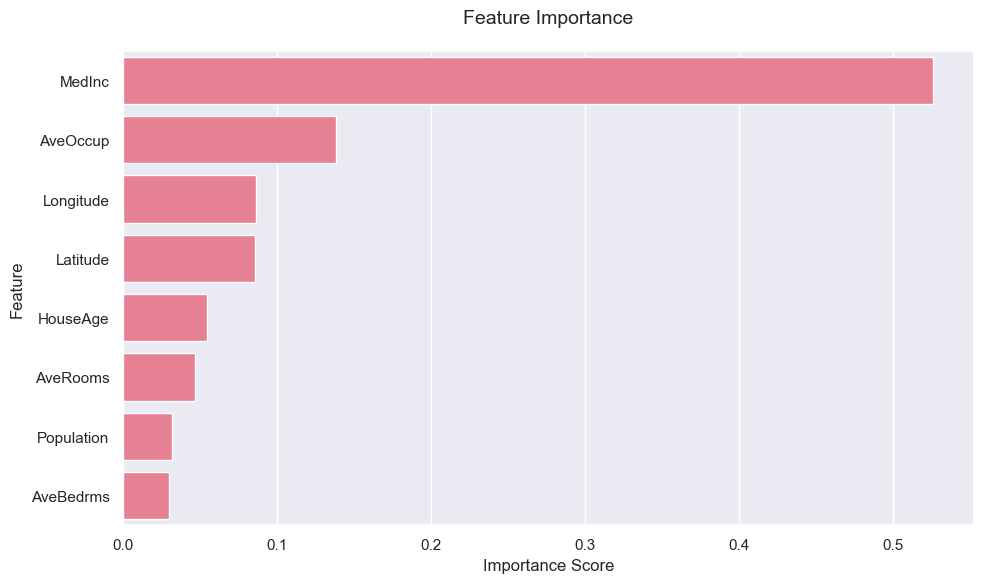

In [72]:
# Feature importance plot (Seaborn)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance', pad=20, fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig(('Bar_plot.png'), dpi=300, bbox_inches='tight')
plt.show()

In [38]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 0.2563
Root Mean Squared Error: 0.5062
Mean Absolute Error: 0.3322
R-squared Score: 0.8047



###  Actual vs Predicted Values Plot
#### Purpose: To evaluate the model's prediction accuracy
#### Interpretation:
#### - Each point represents a prediction
#### - X-axis shows actual values
### - Y-axis shows predicted values
#### - Red dashed line shows perfect predictions
### Key Insights:
#### - Shows how well the model predictions match actual values
#### - Reveals any systematic over/under-prediction
#### - Helps identify areas where the model performs well or poorly


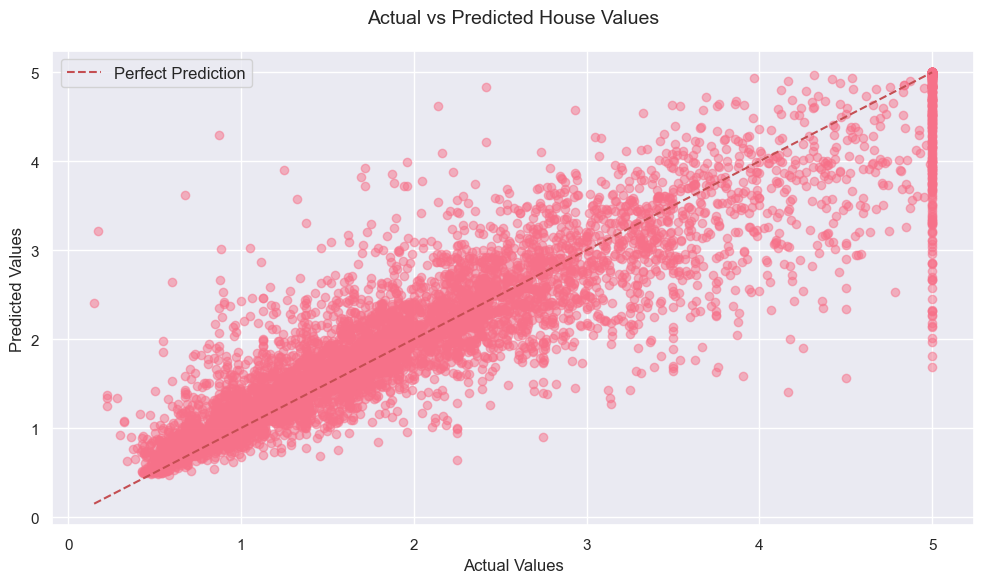

In [73]:
# Actual vs Predicted plot (Matplotlib)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted House Values', pad=20, fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(('Scatter_plot.png'), dpi=300, bbox_inches='tight')
plt.show()

### 6. Conclusion
#### This analysis of the California Housing Dataset has provided valuable insights into factors affecting house prices in California. The Random Forest Regressor model has shown good performance in predicting median house values, with key findings including:
#### 1. Strong correlation between median income and house values
#### 2. Geographic location (latitude/longitude) plays a significant role in house pricing
#### 3. Housing characteristics like average rooms and bedrooms show moderate correlation with house values
#### The model's performance metrics indicate reasonable accuracy in predictions, though there's room for improvement through feature engineering or model tuning. 